<a href="https://colab.research.google.com/github/LeonardoPoletti/ExploratoryAnalysis-MovieLens/blob/master/ExploratoryAnalysis-MovieLens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise do Dataset do MovieLens

## Leitura do dataset

In [0]:
import pandas as pd

In [0]:
df_filmes = pd.read_csv('https://raw.githubusercontent.com/LeonardoPoletti/Dataset/master/MovieLens/movies.csv')
df_avaliacoes = pd.read_csv('https://raw.githubusercontent.com/LeonardoPoletti/Dataset/master/MovieLens/ratings.csv')

In [0]:
df_filmes

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [0]:
df_avaliacoes

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [0]:
df_filmes.shape

(9742, 3)

In [0]:
df_avaliacoes.shape

(100836, 4)

In [0]:
?df_filmes.head
?df_filmes

## Alteração do Cabeçalho

In [0]:
df_filmes.columns = ['filmeId', 'titulo', 'genero']
df_filmes.head()

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
df_avaliacoes.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
df_avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Analise Inicial do Filme 1

In [0]:
avaliacao_do_filme_1 = df_avaliacoes.query('filmeId==1')
avaliacao_do_filme_1.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


In [0]:
avaliacao_do_filme_1.describe()

,usuarioId,filmeId,nota,momento
count,215.000000,215.0,215.000000,2.150000e+02
mean,306.530233,1.0,3.920930,1.129835e+09
std,180.419754,0.0,0.834859,2.393163e+08
min,1.000000,1.0,0.500000,8.293223e+08
25%,155.500000,1.0,3.500000,8.779224e+08
50%,290.000000,1.0,4.000000,1.106855e+09
75%,468.500000,1.0,4.500000,1.348523e+09
max,610.000000,1.0,5.000000,1.535710e+09


In [0]:
avaliacao_do_filme_1.mean()

usuarioId    3.065302e+02
filmeId      1.000000e+00
nota         3.920930e+00
momento      1.129835e+09
dtype: float64

## Analise Avaliações

In [0]:
df_avaliacoes['nota']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [0]:
df_avaliacoes['nota'].mean()

3.501556983616962

In [0]:
avaliacao_do_filme_1['nota'].mean()

3.9209302325581397

In [0]:
notas_medias_por_filmes = df_avaliacoes.groupby('filmeId')['nota'].mean()
notas_medias_por_filmes.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

## Unindo os Datasets

In [0]:
filmes_com_media = df_filmes.join(notas_medias_por_filmes, on='filmeId')
filmes_com_media.head()

,filmeId,titulo,genero,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [0]:
filmes_com_media.sort_values('nota', ascending=False).head(15)

,filmeId,titulo,genero,nota
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
4251,6201,Lady Jane (1986),Drama|Romance,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0
9122,145994,Formula of Love (1984),Comedy,5.0


## Visualização

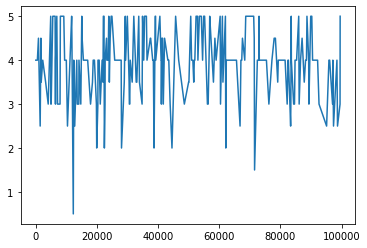

In [0]:
df_avaliacoes.query('filmeId == 1')['nota'].plot()

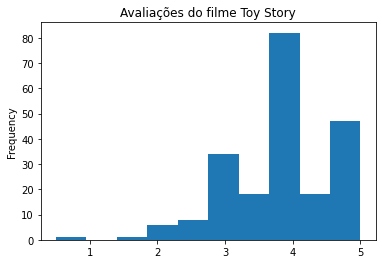

In [0]:
df_avaliacoes.query('filmeId == 1')['nota'].plot(kind='hist', title='Avaliações do filme Toy Story')

In [0]:
import matplotlib.pyplot as plt

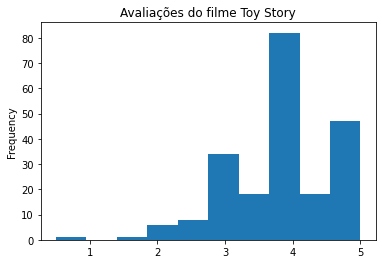

In [0]:
df_avaliacoes.query('filmeId==1')['nota'].plot(kind='hist')
plt.title('Avaliações do filme Toy Story')
plt.show()

Text(0.5, 1.0, 'Avaliação do filme Jumanji')

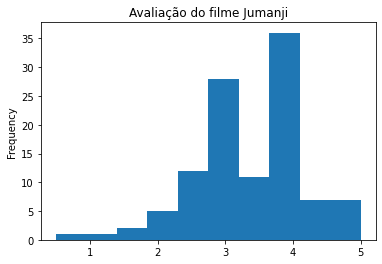

In [0]:
df_avaliacoes.query('filmeId == 2')['nota'].plot(kind = 'hist')
plt.title('Avaliação do filme Jumanji')

Text(0.5, 1.0, 'Avaliação do filme Justice League: Doom')

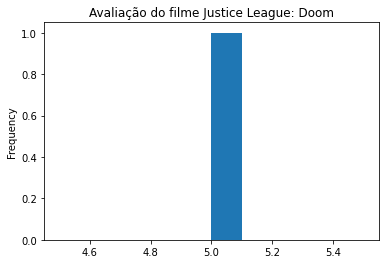

In [0]:
df_avaliacoes.query('filmeId == 102084')['nota'].plot(kind = 'hist')
plt.title('Avaliação do filme Justice League: Doom')